In [33]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import scipy.stats as stats

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn import set_config
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import KBinsDiscretizer

In [134]:
df= pd.read_csv("Titanic-Dataset.csv")

In [135]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


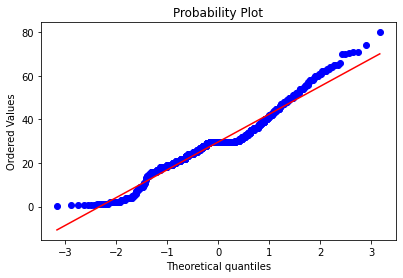

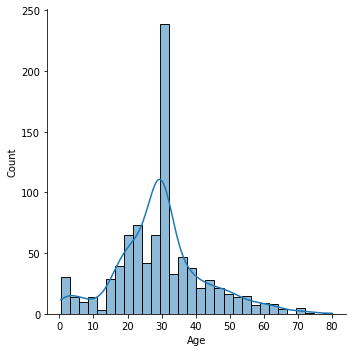

In [142]:
plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
stats.probplot(df['Age'],dist='norm',plot=plt)

plt.subplot(1,2,1)
sns.displot(df['Age'],kde=True)

plt.show()

In [78]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin','Pclass','Sex','SibSp','Parch','Embarked'],inplace=True)

In [141]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [80]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [81]:
df


,Survived,Age,Fare
0,0,22.000000,7.2500
1,1,38.000000,71.2833
2,1,26.000000,7.9250
3,1,35.000000,53.1000
4,0,35.000000,8.0500
...,...,...,...
886,0,27.000000,13.0000
887,1,19.000000,30.0000
888,0,29.699118,23.4500
889,1,26.000000,30.0000


In [82]:
#train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns=['Survived']),
                df['Survived'],
                test_size=0.2,
                )

In [98]:
X_train

,Age,Fare
285,33.000000,8.6625
203,45.500000,7.2250
735,28.500000,16.1000
600,24.000000,27.0000
125,12.000000,11.2417
...,...,...
329,16.000000,57.9792
313,28.000000,7.8958
509,26.000000,56.4958
309,30.000000,56.9292


In [83]:
import warnings
import matplotlib
warnings.filterwarnings("ignore", category=matplotlib.MatplotlibDeprecationWarning)

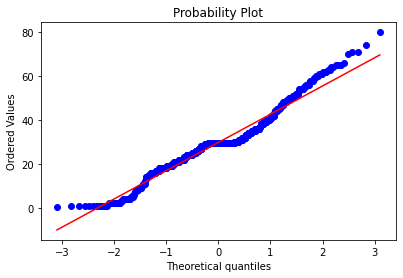

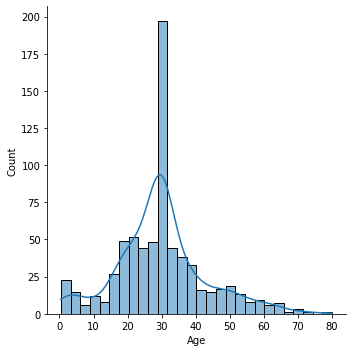

In [133]:
plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
stats.probplot(X_train['Age'],dist='norm',plot=plt)

plt.subplot(1,2,1)
sns.displot(X_train['Age'],kde=True)

plt.show()

In [93]:
trf=FunctionTransformer(func=np.log1p)

In [94]:
X_train_transformed=trf.fit_transform(X_train)
X_test_transformed=trf.transform(X_test)

In [95]:
clf1=DecisionTreeClassifier()
clf2=LogisticRegression()
clf1.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred1=clf1.predict(X_test)
y_pred2=clf2.predict(X_test)

print("DT accuracy",accuracy_score(y_test,y_pred1))
print("LR accuracy",accuracy_score(y_test,y_pred2))


DT accuracy 0.6424581005586593
LR accuracy 0.6312849162011173


In [104]:
kbin_age=KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')
kbin_fare=KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')

In [105]:
trf1=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

X_train_transformed1=trf1.fit_transform(X_train)
X_test_transformed1=trf1.transform(X_test)

clf1.fit(X_train_transformed1,y_train)
clf2.fit(X_train_transformed1,y_train)

y_pred3=clf1.predict(X_test)
y_pred4=clf2.predict(X_test)

print("DT accuracy",accuracy_score(y_test,y_pred3))
print("LR accuracy",accuracy_score(y_test,y_pred4))

C:\Users\Shailesh\anaconda4\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Shailesh\anaconda4\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


DT accuracy 0.6368715083798883
LR accuracy 0.5418994413407822


C:\Users\Shailesh\anaconda4\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\Shailesh\anaconda4\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
